# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )

Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [46]:
%run parse_data.ipynb

( df.groupby('topic')['number_with_outcome'].describe() ).dropna()

,count,mean,std,min,25%,50%,75%,max
topic,,,,,,,,
ACCESS TO CARE,2216.0,921.565433,2260.824742,21.0,89.0,245.0,794.75,23642.0
DEATH,152.0,71.717105,123.361119,20.0,28.0,37.5,68.00,1216.0
DENTAL,1595.0,233.623655,528.823220,21.0,33.0,65.0,193.00,5128.0
HEALTH BEHAVIOR,2511.0,150.990840,315.893141,20.0,37.0,70.0,155.50,7300.0
HEALTH CONDITION,25788.0,660.547619,3812.263022,21.0,39.0,87.0,293.00,176888.0
MENTAL HEALTH,5439.0,152.815959,402.022136,20.0,31.0,52.0,116.00,9358.0
NUTRITION,8358.0,409.755196,1490.076453,14.0,35.0,71.0,198.75,23229.0
SAFETY,8629.0,344.785723,1363.045314,20.0,37.0,75.0,211.00,42877.0
SOCIAL DETERMINANT,1281.0,469.175644,1623.971107,21.0,35.0,76.0,239.00,19455.0


In [41]:
pd.DataFrame(np.unique(df['topic']))

,0
0,ACCESS TO CARE
1,DEATH
2,DENTAL
3,HEALTH BEHAVIOR
4,HEALTH CONDITION
5,MENTAL HEALTH
6,NUTRITION
7,SAFETY
8,SOCIAL DETERMINANT
9,SUBSTANCE USE


In [47]:
pd.DataFrame(np.unique(df['race_ethnicity'])) )

,0
0,ALL
1,ASIAN
2,ASIAN OR PACIFIC ISLANDER
3,BLACK OR AFRICAN AMERICAN
4,HISPANIC OR LATINO/A
5,MULTIRACE
6,NATIVE AMERICAN
7,NOT REPORTED
8,OTHER
9,PACIFIC ISLANDER


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [5]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [59]:
df = df.dropna(subset = ['denominator', 'number_with_outcome'])

def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = ( df[['denominator', 'number_with_outcome']].apply(lambda x: central(x), axis=0) )
    round_dict = {'denominator': 3, 'number_with_outcome': 3}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,denominator,number_with_outcome
mean,42740.203,462.246
median,7184.000,74.000
mode,1158.000,21.000


For more information, let's make a table that counts the total population recorded and the number of people with the outcome for each topic.

In [7]:
df[['denominator', 'number_with_outcome', 'topic']].groupby(
    ['topic']).count()

,denominator,number_with_outcome
topic,,
ACCESS TO CARE,2216,2216
DEATH,96,96
DENTAL,1595,1595
HEALTH BEHAVIOR,2511,2511
HEALTH CONDITION,25788,25788
MENTAL HEALTH,5439,5439
NUTRITION,8358,8358
SAFETY,8629,8629
SOCIAL DETERMINANT,1281,1281


<br>

Let's repeat for a dispersion table:

</br>

In [8]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'denominator': 3, 'number_with_outcome': 3}
    df_dispersion         = ( df[['denominator', 'number_with_outcome']] ).apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,denominator,number_with_outcome
st.dev.,130898.941,2625.755
min,23.000,14.000
max,2804452.000,176888.000
range,2804429.000,176874.000
25th,1116.000,36.000
75th,26367.000,221.000
IQR,25251.000,185.000


Let's create scatterplots for the DV (number of people with each outcome) vs. each two of the IVs (outcome and year):

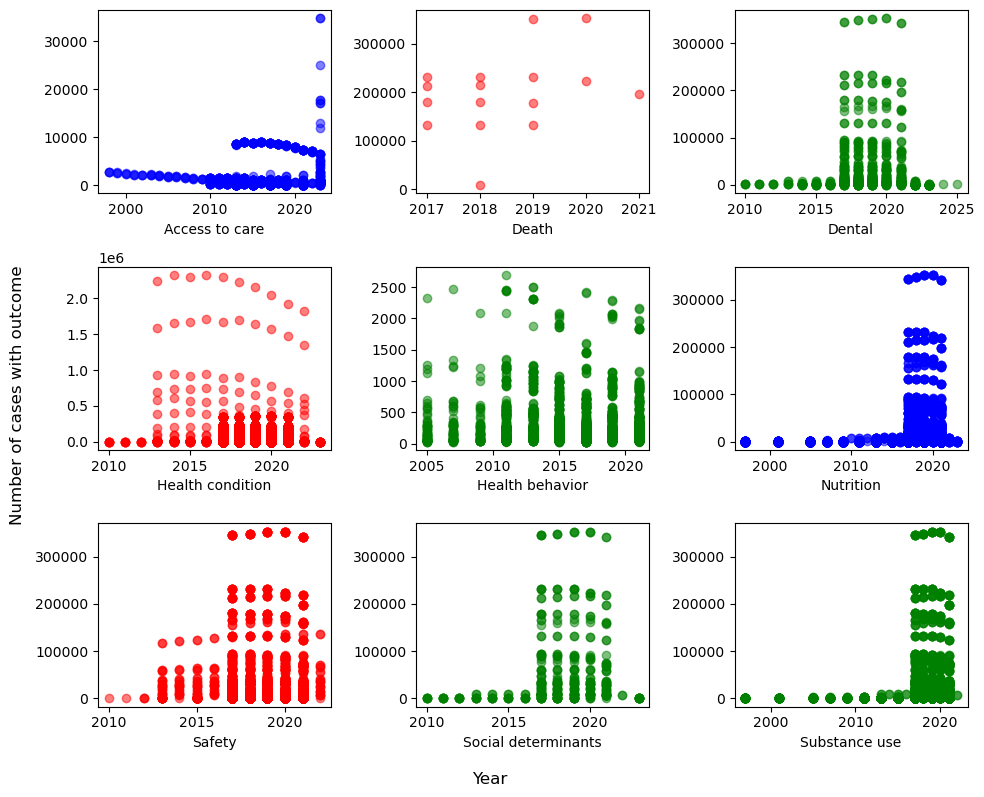

In [105]:
df_access = df[['number_with_outcome']].where( df.topic == 'ACCESS TO CARE' )
df_death = df[['number_with_outcome']].where( df.topic == 'DEATH' )
df_dental = df[['number_with_outcome']].where( df.topic == 'DENTAL' )
df_healthcond = df[['number_with_outcome']].where( df.topic == 'HEALTH CONDITION' )
df_healthbehav = df[['number_with_outcome']].where( df.topic == 'HEALTH BEHAVIOR' )
df_nutrition = df[['number_with_outcome']].where( df.topic == 'NUTRITION' )
df_safety = df[['number_with_outcome']].where( df.topic == 'SAFETY' )
df_socialdeterm = df[['number_with_outcome']].where( df.topic == 'SOCIAL DETERMINANT' )
df_substance = df[['number_with_outcome']].where( df.topic == 'SUBSTANCE USE' )

fig,axs = plt.subplots( 3, 3, figsize=(10,8), tight_layout=False )
axs[0,0].scatter( df[['year']], df_access, alpha=0.5, color='b' )
axs[0,0].set_xlabel('Access to care')

axs[0,1].scatter( df[['year']], df_death, alpha=0.5, color='r' )
axs[0,1].set_xlabel('Death')

axs[0,2].scatter( df[['year']], df_dental, alpha=0.5, color='g' )
axs[0,2].set_xlabel('Dental')

axs[1,0].scatter( df[['year']], df_healthcond, alpha=0.5, color='r' )
axs[1,0].set_xlabel('Health condition')

axs[1,1].scatter( df[['year']], df_healthbehav, alpha=0.5, color='g' )
axs[1,1].set_xlabel('Health behavior')

axs[1,2].scatter( df[['year']], df_nutrition, alpha=0.5, color='b' )
axs[1,2].set_xlabel('Nutrition')

axs[2,0].scatter( df[['year']], df_safety, alpha=0.5, color='r' )
axs[2,0].set_xlabel('Safety')

axs[2,1].scatter( df[['year']], df_socialdeterm, alpha=0.5, color='g' )
axs[2,1].set_xlabel('Social determinants')

axs[2,2].scatter( df[['year']], df_substance, alpha=0.5, color='g' )
axs[2,2].set_xlabel('Substance use')

fig.supxlabel('Year')
fig.supylabel('Number of cases with outcome')

plt.show()